In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Part (a): Random Sample of 25 observations

In [ ]:
np.random.seed(42)  # Setting seed for reproducibility
rand_sample = df.sample(25)
rand_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
204,6,103,72,32,190,37.7,0.324,55,0
97,1,71,48,18,76,20.4,0.323,22,0
336,0,117,0,0,0,33.8,0.932,44,0
568,4,154,72,29,126,31.3,0.338,37,0
148,5,147,78,0,0,33.7,0.218,65,0


In [ ]:
# Population statistics
mean_glucose = df['Glucose'].mean()
max_glucose = df['Glucose'].max()
# Sample statistics
samp_mean_glucose = rand_sample['Glucose'].mean()
samp_max_glucose = rand_sample['Glucose'].max()
# Print the statistics
print(f"Population Mean Glucose: {mean_glucose}")
print(f"Sample Mean Glucose: {samp_mean_glucose}")
print(f"Population Max Glucose: {max_glucose}")
print(f"Sample Max Glucose: {samp_max_glucose}")



Population Mean Glucose: 120.89453125
Sample Mean Glucose: 116.64
Population Max Glucose: 199
Sample Max Glucose: 183


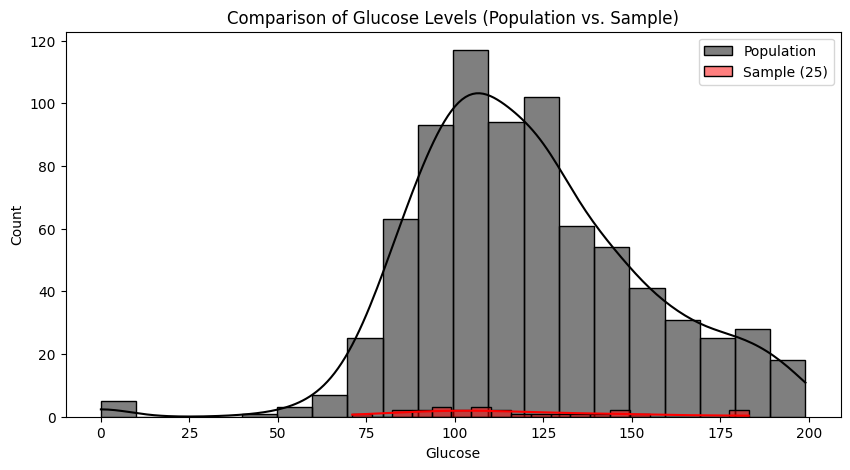

In [ ]:
# Plot comparison
plt.figure(figsize=(10, 5))
sns.histplot(df['Glucose'], label='Population', kde=True, color='black', bins=20)
sns.histplot(rand_sample['Glucose'], label='Sample (25)', kde=True, color='red', bins=20)
plt.title("Comparison of Glucose Levels (Population vs. Sample)")
plt.xlabel("Glucose")
plt.legend()
plt.show()

#Part (b): 98th Percentile of BMI

Population 98th Percentile of BMI: 47.52599999999996
Sample 98th Percentile of BMI: 40.248


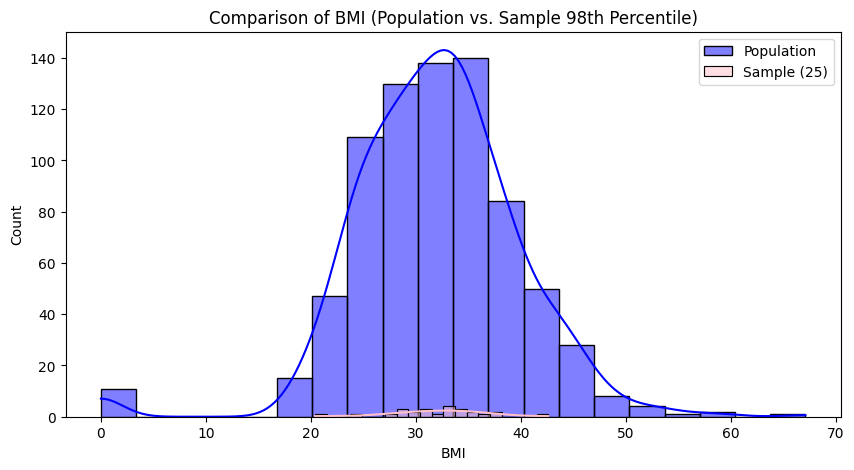

In [ ]:
bmi = np.percentile(df['BMI'], 98)
BMI = np.percentile(rand_sample['BMI'], 98)

print(f"Population 98th Percentile of BMI: {bmi}")
print(f"Sample 98th Percentile of BMI: {BMI}")

# Plot comparison
plt.figure(figsize=(10, 5))
sns.histplot(df['BMI'], label='Population', kde=True, color='blue', bins=20)
sns.histplot(rand_sample['BMI'], label='Sample (25)', kde=True, color='pink', bins=20)
plt.title("Comparison of BMI (Population vs. Sample 98th Percentile)")
plt.xlabel("BMI")
plt.legend()
plt.show()

# Part (c): Bootstrap sampling for Blood Pressure

Bootstrap Mean Blood Pressure: 69.10449333333332
Population Mean Blood Pressure: 69.10546875
Bootstrap Std Dev Blood Pressure: 19.245259098560986
Population Std Dev Blood Pressure: 19.355807170644777
Bootstrap 98th Percentile Blood Pressure: 97.87400000000002
Population 98th Percentile Blood Pressure: 99.31999999999994


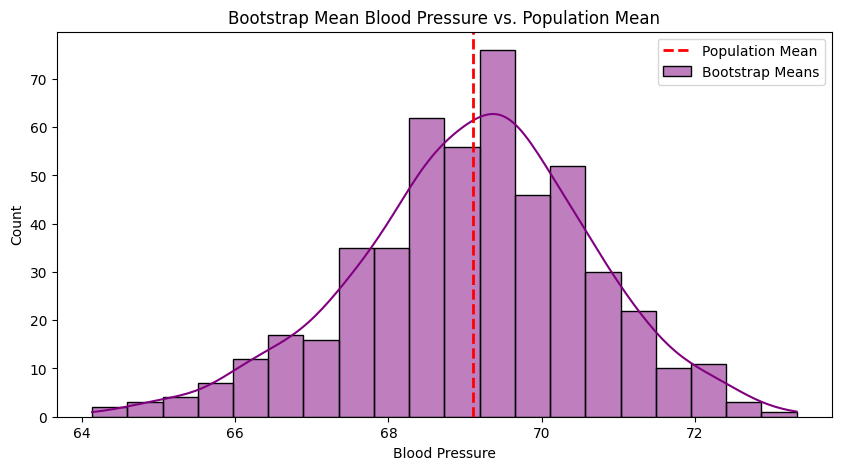

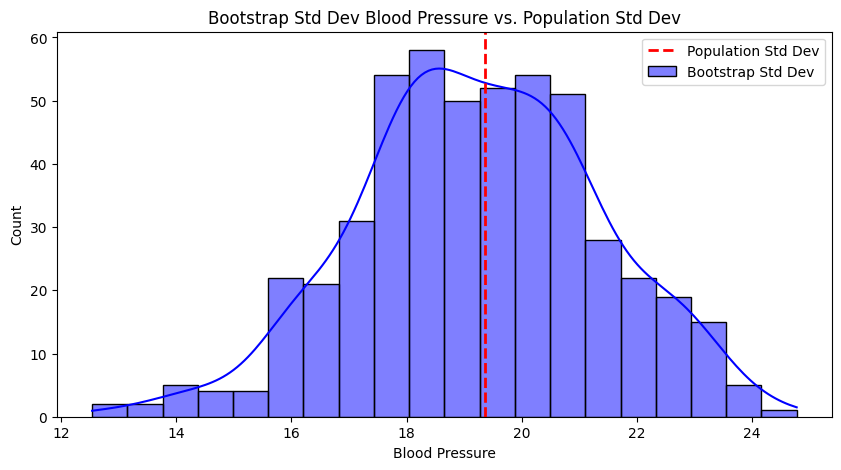

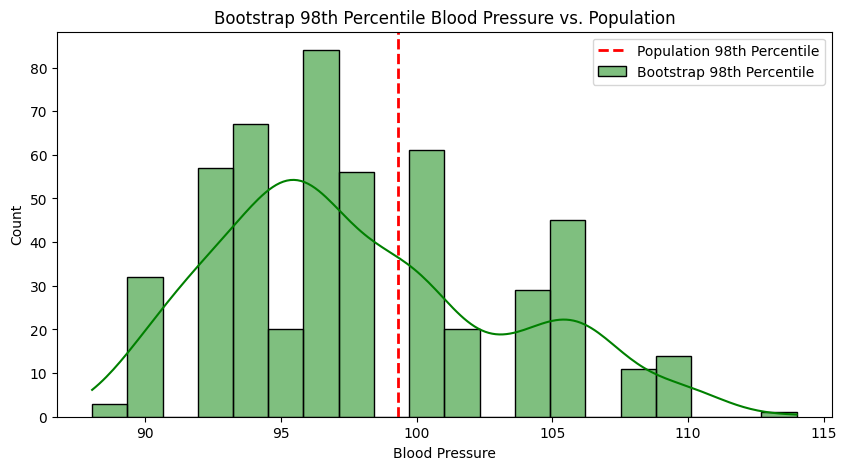

In [ ]:
bts_means = [] #initializing lists to store bootstrap stats
bts_stds = []
bts_percentiles = []

for _ in range(500):
    bts_sample = df['BloodPressure'].sample(150, replace=True)
    bts_means.append(bts_sample.mean())
    bts_stds.append(bts_sample.std())
    bts_percentiles.append(np.percentile(bts_sample, 98))

# Calculating bootstrap statistics
bts_mean = np.mean(bts_means)
bts_std = np.mean(bts_stds)
bts_98th = np.mean(bts_percentiles)

# Population statistics for Blood Pressure
mean_bp = df['BloodPressure'].mean()
std_bp = df['BloodPressure'].std()
pct_bp = np.percentile(df['BloodPressure'], 98)

print(f"Bootstrap Mean Blood Pressure: {bts_mean}")
print(f"Population Mean Blood Pressure: {mean_bp}")
print(f"Bootstrap Std Dev Blood Pressure: {bts_std}")
print(f"Population Std Dev Blood Pressure: {std_bp}")
print(f"Bootstrap 98th Percentile Blood Pressure: {bts_98th}")
print(f"Population 98th Percentile Blood Pressure: {pct_bp}")

# Plotting bootstrap means and population mean
plt.figure(figsize=(10, 5))
sns.histplot(bts_means, label='Bootstrap Means', kde=True, color='purple', bins=20)
plt.axvline(mean_bp, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title("Bootstrap Mean Blood Pressure vs. Population Mean")
plt.xlabel("Blood Pressure")
plt.legend()
plt.show()

# Plotting the comparison of standard deviation of Blood Pressure
plt.figure(figsize=(10, 5))
sns.histplot(bts_stds, label='Bootstrap Std Dev', kde=True, color='blue', bins=20)
plt.axvline(std_bp, color='red', linestyle='dashed', linewidth=2, label='Population Std Dev')
plt.title("Bootstrap Std Dev Blood Pressure vs. Population Std Dev")
plt.xlabel("Blood Pressure")
plt.legend()
plt.show()

# Plotting the comparison of 98th percentile of Blood Pressure
plt.figure(figsize=(10, 5))
sns.histplot(bts_percentiles, label='Bootstrap 98th Percentile', kde=True, color='green', bins=20)
plt.axvline(pct_bp, color='red', linestyle='dashed', linewidth=2, label='Population 98th Percentile')
plt.title("Bootstrap 98th Percentile Blood Pressure vs. Population")
plt.xlabel("Blood Pressure")
plt.legend()
plt.show()

#Report on bootstrap analysis for blood pressure



Initially, we need to create 500 samples from the population and need to find the average mean, standard deviation and percentile for the blood pressure.
**Interpretation & Findings**

**Mean:**

The mean calculated from the bootstrap samples (69.10) is nearly identical to the population mean (69.11). This indicates that using bootstrap resampling provides an accurate and reliable estimate of the mean.

**Standard	Deviation:**

The standard deviation from the bootstrap samples (19.25) is very close to the population standard deviation (19.36). This similarity suggests that the variation captured by the bootstrap samples accurately reflects the variability in the entire population.

**98th	Percentile:**

The 98th percentile obtained from the bootstrap samples (97.87) is slightly lower than the population value (99.32). Despite this difference, it still falls within a reasonable range, which is expected given the natural variability of extreme values when sampling.

**Conclusion**

The bootstrap estimates for the mean, standard deviation, and 98th percentile of blood pressure are quite like the actual population values. This shows that the bootstrap method works well for estimating population parameters and assessing uncertainty, especially when direct calculations are difficult or not possible. The small differences observed are normal and can be attributed to sampling variability, particularly when it comes to estimating high percentiles.
Overall, bootstrap resampling is a practical and reliable approach for statistical analysis in this case.


